In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [17]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [18]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from source.pca import PCA
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Без PCA:      R2 = {reg.score(X_test, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}")

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

reg_pca = LinearRegression().fit(X_train_pca, y_train)
y_pred_pca = reg_pca.predict(X_test_pca)
print(f"С PCA (4 dim): R2 = {reg_pca.score(X_test_pca, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred_pca):.4f}")

Без PCA:      R2 = 0.5758, MSE = 0.5559
(16512, 8) (8,) (8, 8)
С PCA (4 dim): R2 = 0.5799, MSE = 0.5506


(20640, 8) (8,) (8, 8)


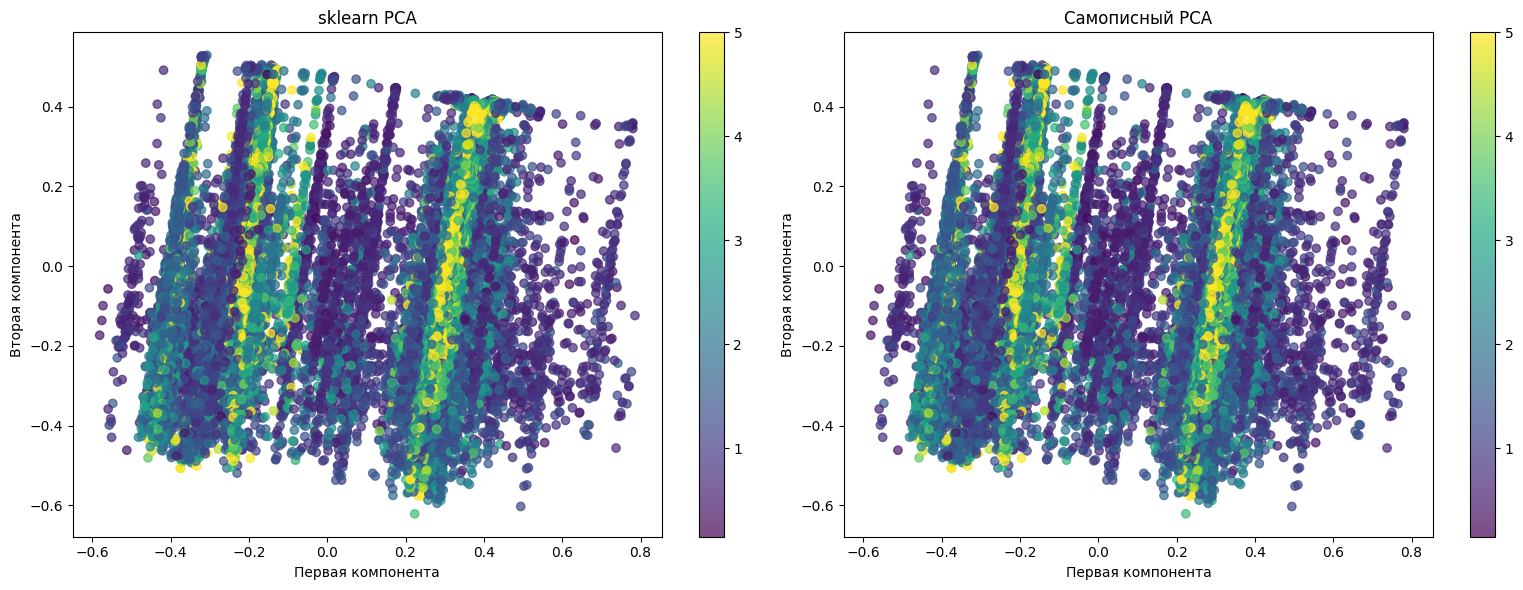

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from source.pca import PCA as MyPCA

pca_sklearn = PCA(n_components=2)
X_pca_sklearn = pca_sklearn.fit_transform(X)

pca_my = MyPCA(n_components=2)
X_pca_my = pca_my.fit_transform(X)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('sklearn PCA')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')

plt.subplot(1, 2, 2)
plt.scatter(X_pca_my[:, 0], X_pca_my[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('Самописный PCA')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')

plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Без PCA:      R2 = {reg.score(X_test, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}")

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

reg_pca = LinearRegression().fit(X_train_pca, y_train)
y_pred_pca = reg_pca.predict(X_test_pca)
print(f"С PCA (5 dim): R2 = {reg_pca.score(X_test_pca, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred_pca):.4f}")


Без PCA:      R2 = 0.5758, MSE = 0.5559
С PCA (5 dim): R2 = 0.5799, MSE = 0.5506


(20640, 8) (8,) (8, 8)
(20640, 8) (8,) (8, 8)
(20640, 8) (8,) (8, 8)
(20640, 8) (8,) (8, 8)
(20640, 8) (8,) (8, 8)
(20640, 8) (8,) (8, 8)
(20640, 8) (8,) (8, 8)
(20640, 8) (8,) (8, 8)


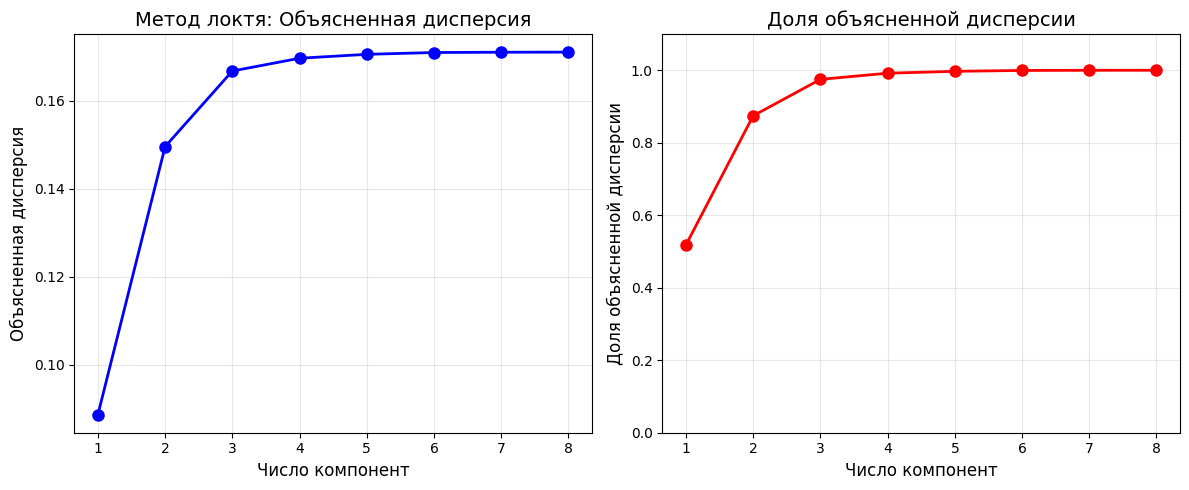

Доля объясненной дисперсии по компонентам:
  1 компонент(а): 0.5183 (51.83%)
  2 компонент(а): 0.8745 (87.45%)
  3 компонент(а): 0.9749 (97.49%)
  4 компонент(а): 0.9919 (99.19%)
  5 компонент(а): 0.9971 (99.71%)


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from source.pca import PCA

X_centered = X - np.mean(X, axis=0)
_, s_full, _ = np.linalg.svd(X_centered, full_matrices=False)
total_variance = np.sum(s_full ** 2) / (X.shape[0] - 1)

n_features = X.shape[1]
explained_variances = []
explained_variance_ratios = []

for n_comp in range(1, n_features + 1):
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    explained_variances.append(pca.explained_variance_)
    
    explained_variance_ratio = np.sum(pca.explained_variance_) / total_variance
    explained_variance_ratios.append(explained_variance_ratio)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, n_features + 1), [np.sum(ev) for ev in explained_variances], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Число компонент', fontsize=12)
plt.ylabel('Объясненная дисперсия', fontsize=12)
plt.title('Метод локтя: Объясненная дисперсия', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, n_features + 1))

plt.subplot(1, 2, 2)
plt.plot(range(1, n_features + 1), explained_variance_ratios, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Число компонент', fontsize=12)
plt.ylabel('Доля объясненной дисперсии', fontsize=12)
plt.title('Доля объясненной дисперсии', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, n_features + 1))
plt.ylim([0, 1.1])

plt.tight_layout()
plt.show()

print("Доля объясненной дисперсии по компонентам:")
for i, ratio in enumerate(explained_variance_ratios[:5], 1):
    print(f"  {i} компонент(а): {ratio:.4f} ({ratio*100:.2f}%)")